# ISIS-II Existing Hall RCS
Initial 3D Gaussian distribution test

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio 
import matplotlib.gridspec as gridspec

In [2]:
plt.rcParams['figure.figsize'] = [5.0, 4.5]
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 14

plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

plt.rcParams['font.size'] = 10
plt.rcParams['legend.fontsize'] = 14

plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 5

In [3]:
if os.name=='nt': # Windows
    %run ../../../00_Scripts/helper_functions.py
    %run ../../../00_Scripts/cpymad_helpers.py
else: # Linux    
    %run '../../../00_Scripts/helper_functions.py'
    %run '../../../00_Scripts/cpymad_helpers.py'

### Add PyORBIT output dictionary .mat file

In [4]:
def add_input_file(dd, filename, label):
    f = filename
    p = dict()
    sio.loadmat(f, mdict=p)
    dd[label] = p
    print ('\tAdded output data from ', filename, '\t dictionary key: ', label)
    return dd

In [5]:
# If adding a bunch file using add_input_file access particles like:
# dd1['1.3']['particles']['x'][0][0][0]

### Add PyORBIT bunch .mat file

In [6]:
def add_bunch_file(dd, filename, label):
    f = filename
    p = sio.loadmat(f, squeeze_me=True,  struct_as_record=False)['particles']
    dd[label] = p
    print ('\tAdded output data from ', filename, '\t dictionary key: ', label)
    return dd

In [7]:
# If using add_bunch_file, access like:
# dd1['2021'].x

## Add initial bunch and plot 

In [8]:
dd1 = dict()

#dd1 = add_input_file(dd1, 'input/mainbunch.mat', 'in')
#dd1 = add_input_file(dd1, 'bunch_output_1/mainbunch_-000001.mat', '-1_1')
#dd1 = add_input_file(dd1, 'bunch_output_2/mainbunch_-000001.mat', '-1_2')
#dd1 = add_input_file(dd1, 'bunch_output_3/mainbunch_-000001.mat', '-1_3')
#dd1 = add_input_file(dd1, 'bunch_output_4/mainbunch_-000001.mat', '-1_4')
dd1 = add_input_file(dd1, 'bunch_output_1/mainbunch_000001.mat', '1_1')
dd1 = add_input_file(dd1, 'bunch_output_2/mainbunch_000001.mat', '1_2')
dd1 = add_input_file(dd1, 'bunch_output_3/mainbunch_000001.mat', '1_3')
dd1 = add_input_file(dd1, 'bunch_output_4/mainbunch_000001.mat', '1_4')
#dd1 = add_input_file(dd1, 'bunch_output/mainbunch_000000.mat', '0')
#dd1 = add_input_file(dd1, 'bunch_output/mainbunch_000001.mat', '1')
#dd1 = add_input_file(dd1, 'bunch_output/mainbunch_000002.mat', '2')

	Added output data from  bunch_output_1/mainbunch_000001.mat 	 dictionary key:  1_1
	Added output data from  bunch_output_2/mainbunch_000001.mat 	 dictionary key:  1_2
	Added output data from  bunch_output_3/mainbunch_000001.mat 	 dictionary key:  1_3
	Added output data from  bunch_output_4/mainbunch_000001.mat 	 dictionary key:  1_4


In [9]:
#dd1['in']['particles']['x'][0][0][0]

In [10]:
dd1.items()

dict_items([('1_1', {'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Tue Oct 12 14:37:07 2021', '__version__': '1.0', '__globals__': [], 'particles': array([[(array([[0.0000e+00, 1.0000e+00, 2.0000e+00, ..., 9.9996e+04, 9.9997e+04,
        9.9998e+04]]), array([[-0.00081011, -0.00031229, -0.00022568, ...,  0.00121581,
        -0.00068269, -0.00026409]]), array([[1.e+08, 1.e+08, 1.e+08, ..., 1.e+08, 1.e+08, 1.e+08]]), array([[ 0.00733305, -0.02980674, -0.01445548, ..., -0.02669054,
        -0.00222949, -0.02675192]]), array([[-0.06265794,  0.12879605,  0.11599093, ...,  0.08882589,
         0.06140015,  0.14934697]]), array([[ 0.0429382 , -0.00556667, -0.05254742, ...,  0.05696312,
        -0.07352362, -0.00769665]]), array([[ 0.02055296, -0.00784415,  0.03391024, ...,  0.02723272,
        -0.03149834, -0.01459191]]), array([[-0.20731677, -0.14274787, -0.22508282, ...,  0.08485292,
        -0.24907119, -0.11284121]]), array([[4.07087925e+00, 1.45021835e+00, 5.64749692e+

In [11]:
for key, value in sorted(dd1.items()):
    print(len(dd1[key]['particles']['z'][0][0][0]))

99999
99999
99999
99999


In [12]:
save_folder = 'Plots/'
make_directory(save_folder)
sc = 'NoSC'
Case = '3D Gaussian'
legend_label = ''    
main_label = 'ISIS'

Directory Plots/ already exists


<ipython-input-13-829555898155>:12: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet"))
  my_cmap.set_under('w',1)


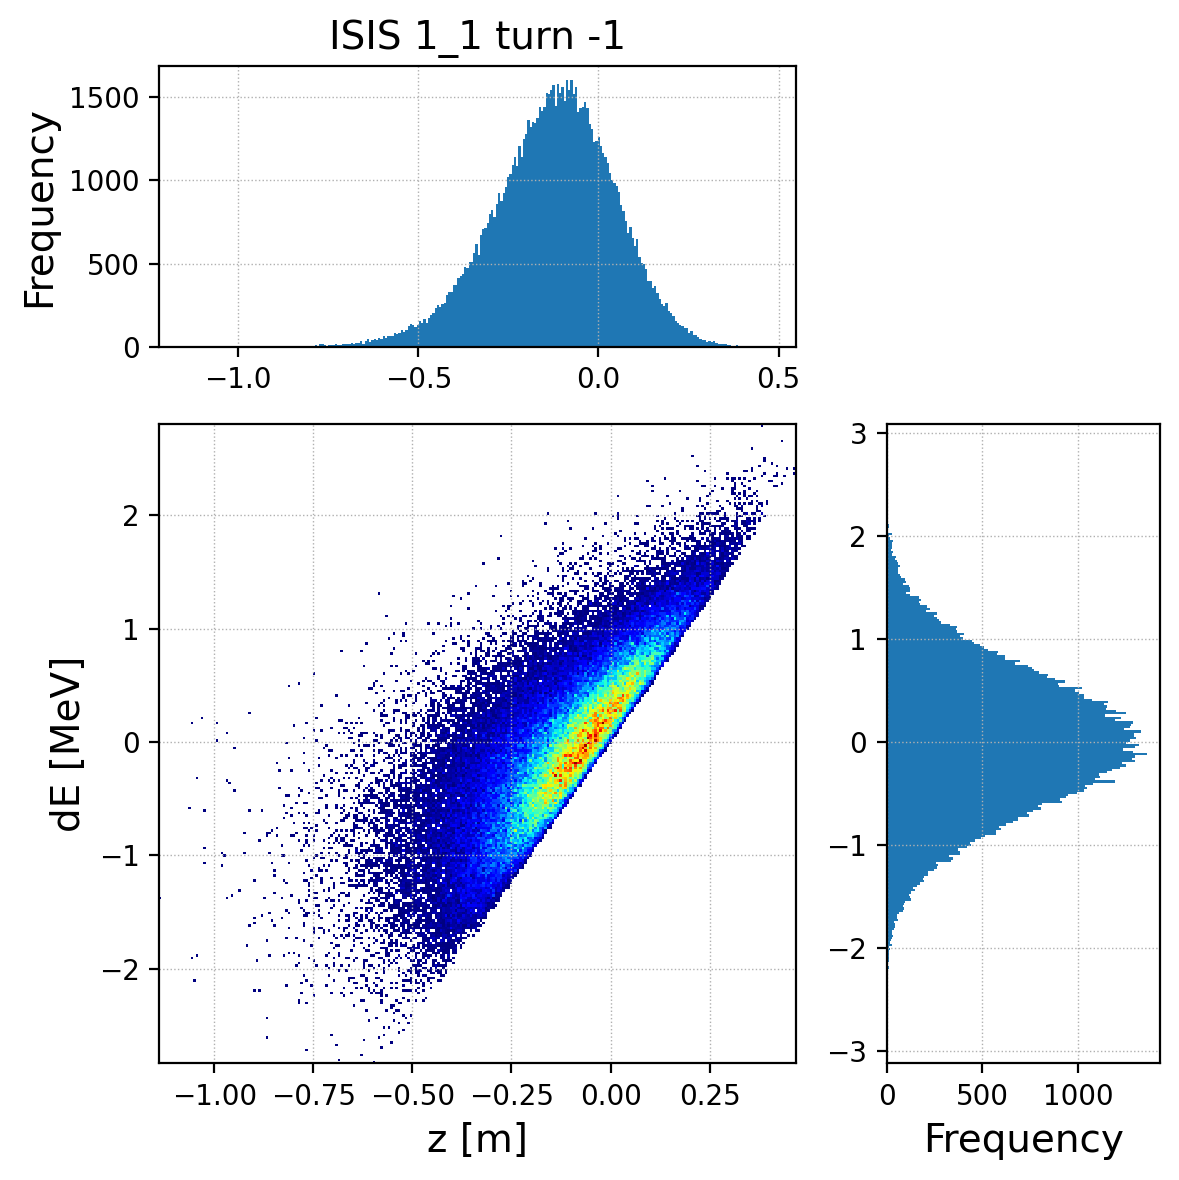

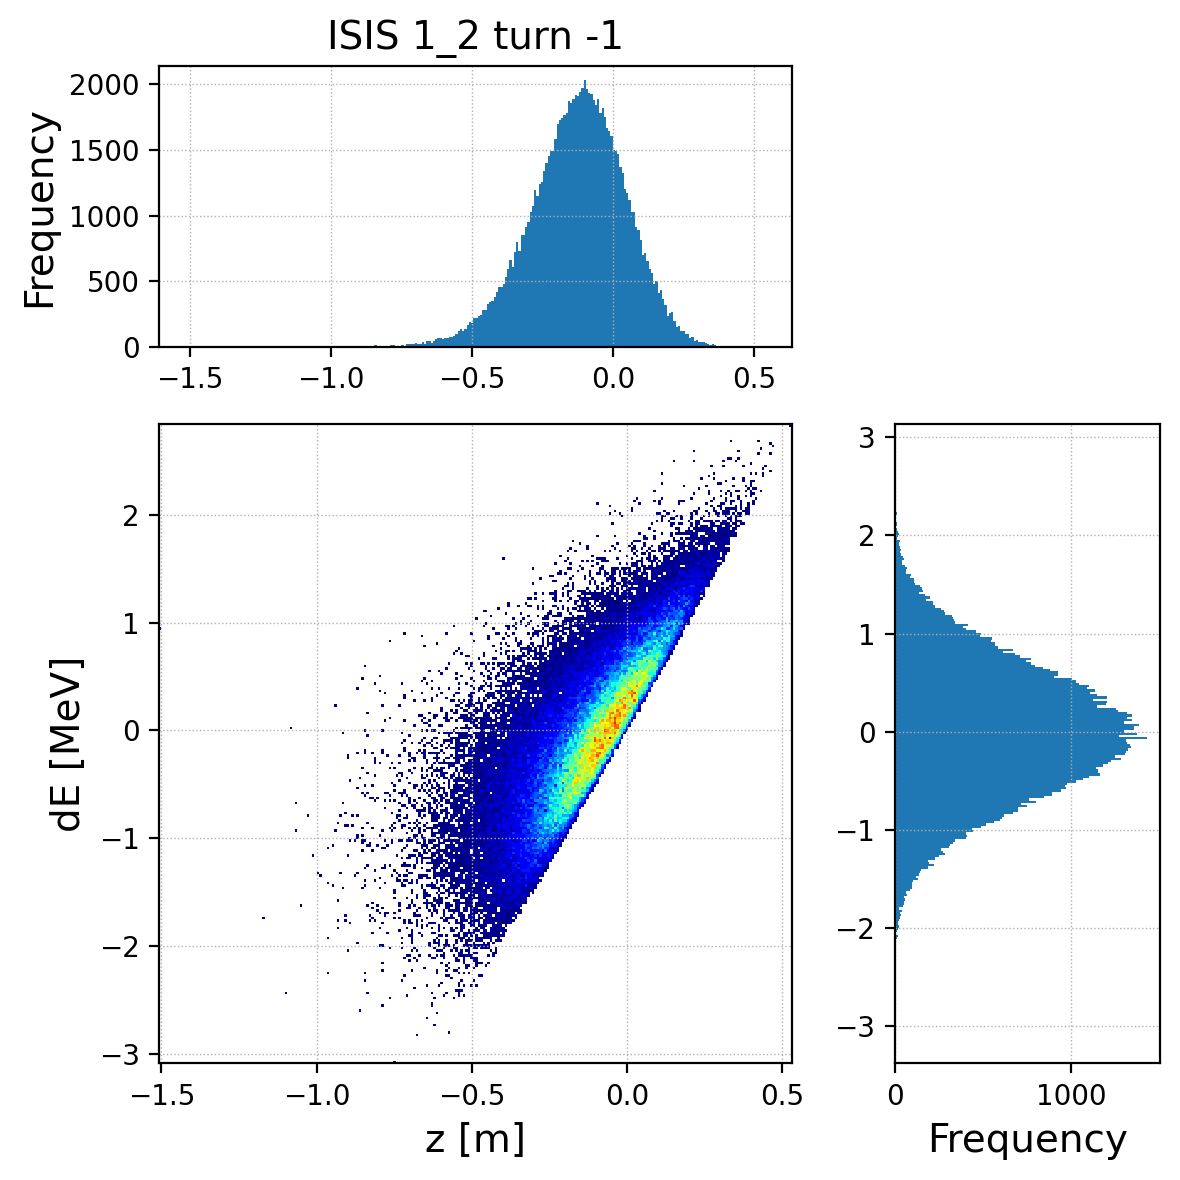

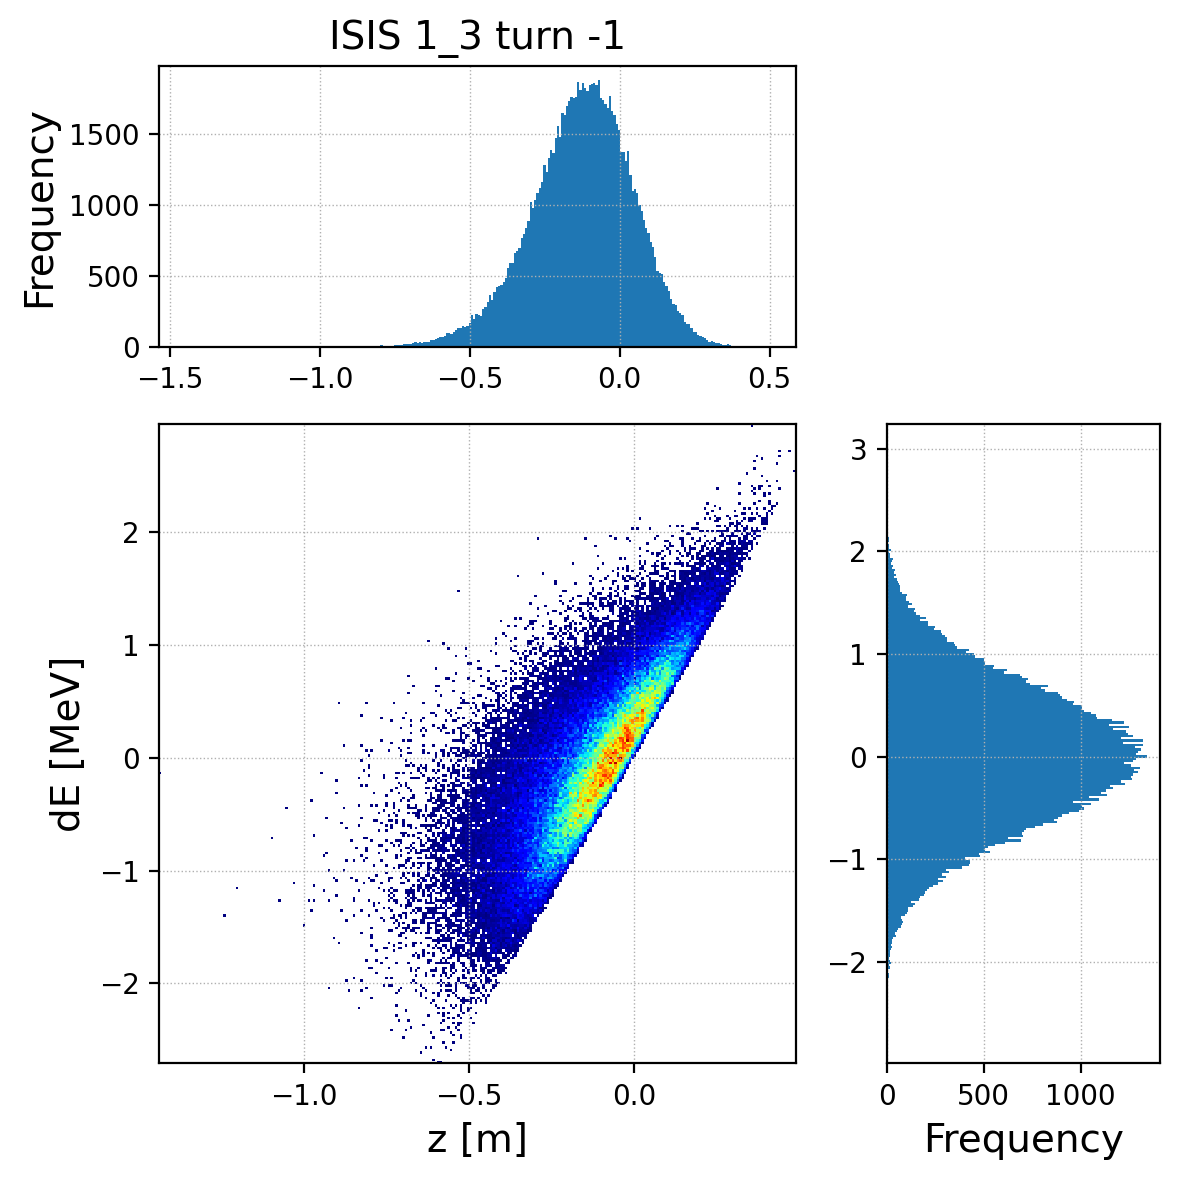

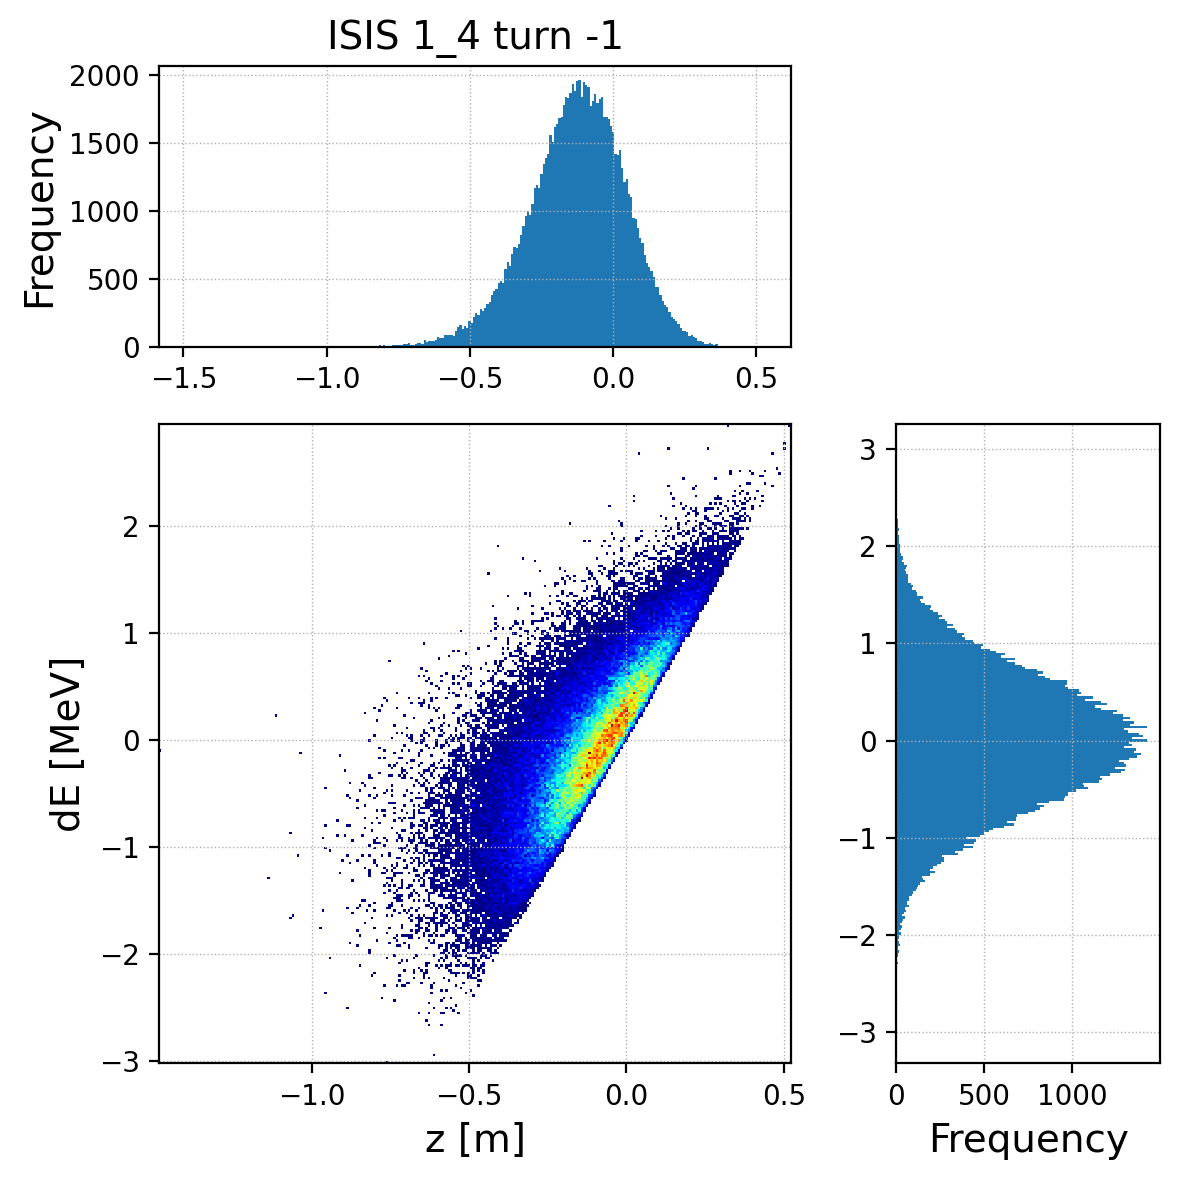

In [13]:
bin_size = 256
turn = -1
zdE_gifnames = []

for key, value in sorted(dd1.items()):
    f, ax = plt.subplots(1, figsize=(6,6))
    gridspec.GridSpec(3,3)
    #f.subplots_adjust(hspace = 0)	# Horizontal spacing between subplots
    f.subplots_adjust(wspace = 0)	# Vertical spacing between subplots

    my_cmap = plt.cm.jet
    my_cmap.set_under('w',1)

    title = str( main_label + ' ' + key + ' turn ' + str(turn) ) 
    
    z = np.array(dd1[key]['particles']['z'][0][0][0])
    dE = np.array(dd1[key]['particles']['dE'][0][0][0])*1E3 #dE in GeV
    
    # First subplot
    plt.subplot2grid((3,3), (0,0), colspan=2, rowspan=1)   
    plt.hist(z, bins=bin_size, range=(np.min(z), np.max(z))) #, norm=mcolors.PowerNorm(gamma))
    plt.title(title)
    plt.ylabel('Frequency')
    plt.grid(which='both', ls=':', lw=0.5)
    #plt.xlim(-30, 30)

    # Main plot
    plt.subplot2grid((3,3), (1,0), colspan=2, rowspan=2)
    plt.hist2d(z, dE, bins=bin_size, cmap=my_cmap, vmin=1, range=[[np.min(z), np.max(z)], [np.min(dE), np.max(dE)]]) #, norm=mcolors.PowerNorm(gamma))
    plt.xlabel('z [m]')
    plt.ylabel('dE [MeV]')
    plt.grid(which='both', ls=':', lw=0.5)
    #plt.xlim(-30, 30)
    #plt.ylim(-10, 10)

    # Second subplot
    plt.subplot2grid((3,3), (1,2), colspan=1, rowspan=2)    
    plt.hist(dE, bins=bin_size, range=(np.min(dE), np.max(dE)), orientation=u'horizontal') #, norm=mcolors.PowerNorm(gamma))
    plt.xlabel('Frequency')
    plt.grid(which='both', ls=':', lw=0.5)
    #plt.ylim(-10, 10)

    current_axis = plt.gca()
    #current_axis.axes.get_yaxis().set_visible(False)

    #ax.xaxis.label.set_size(fontsize)
    #ax.yaxis.label.set_size(fontsize)

    #ax.tick_params(labelsize=fontsize)

    plt.tight_layout()
    savename = str(save_folder + Case +'_z_dE_turn_' + str(turn) + '_' + key + '_hist.png' )
    zdE_gifnames.append(savename)
    f.savefig(savename, dpi=500)

<ipython-input-14-aa1c53eb03f4>:12: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet"))
  my_cmap.set_under('w',1)


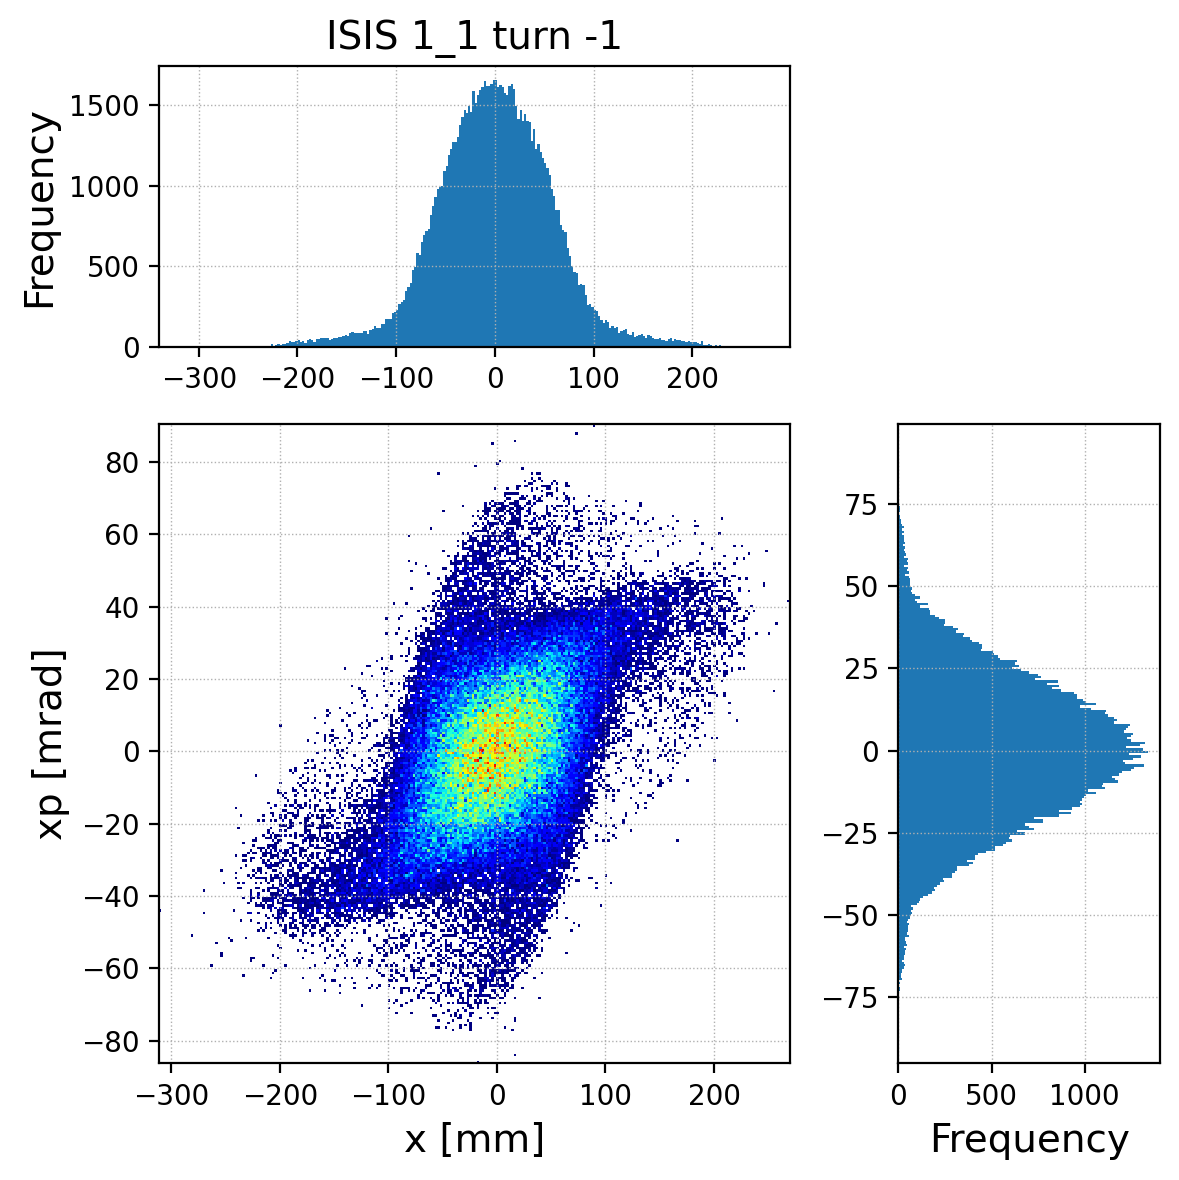

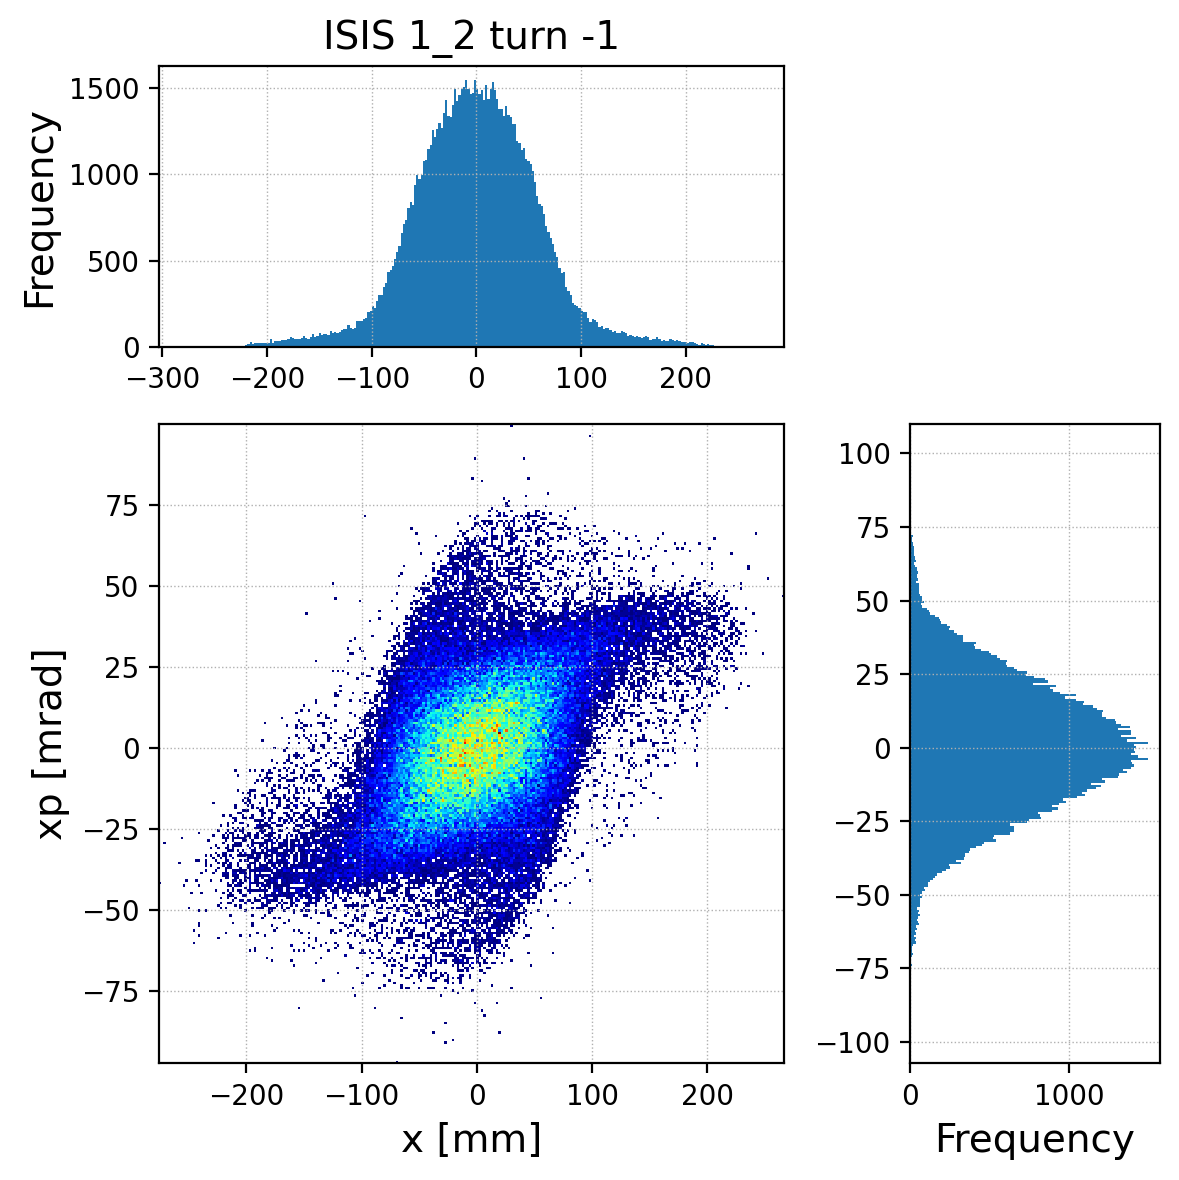

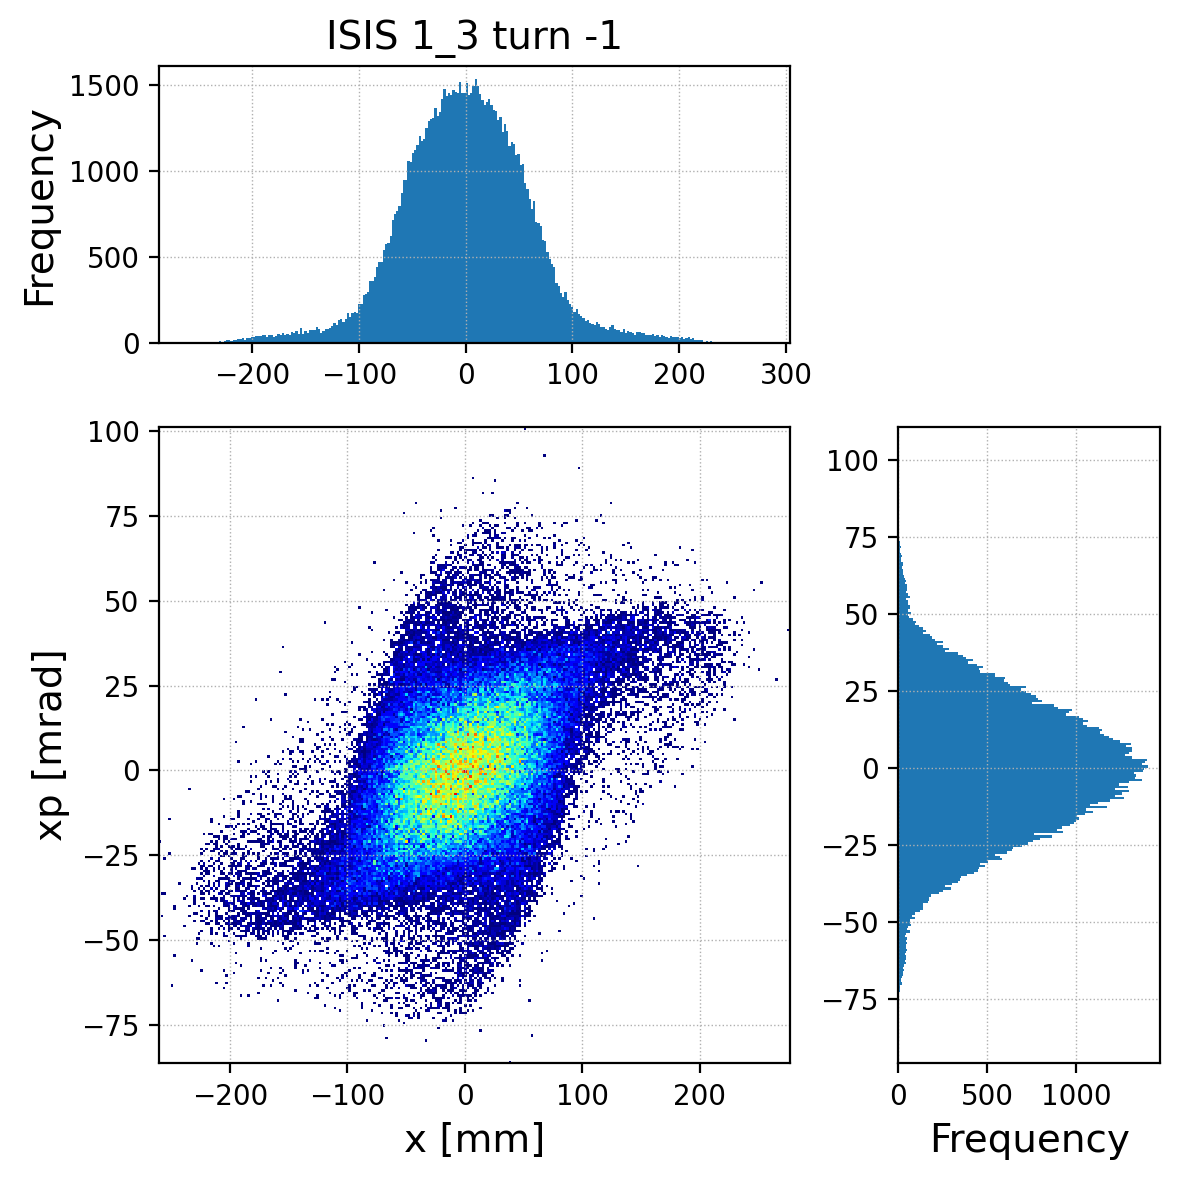

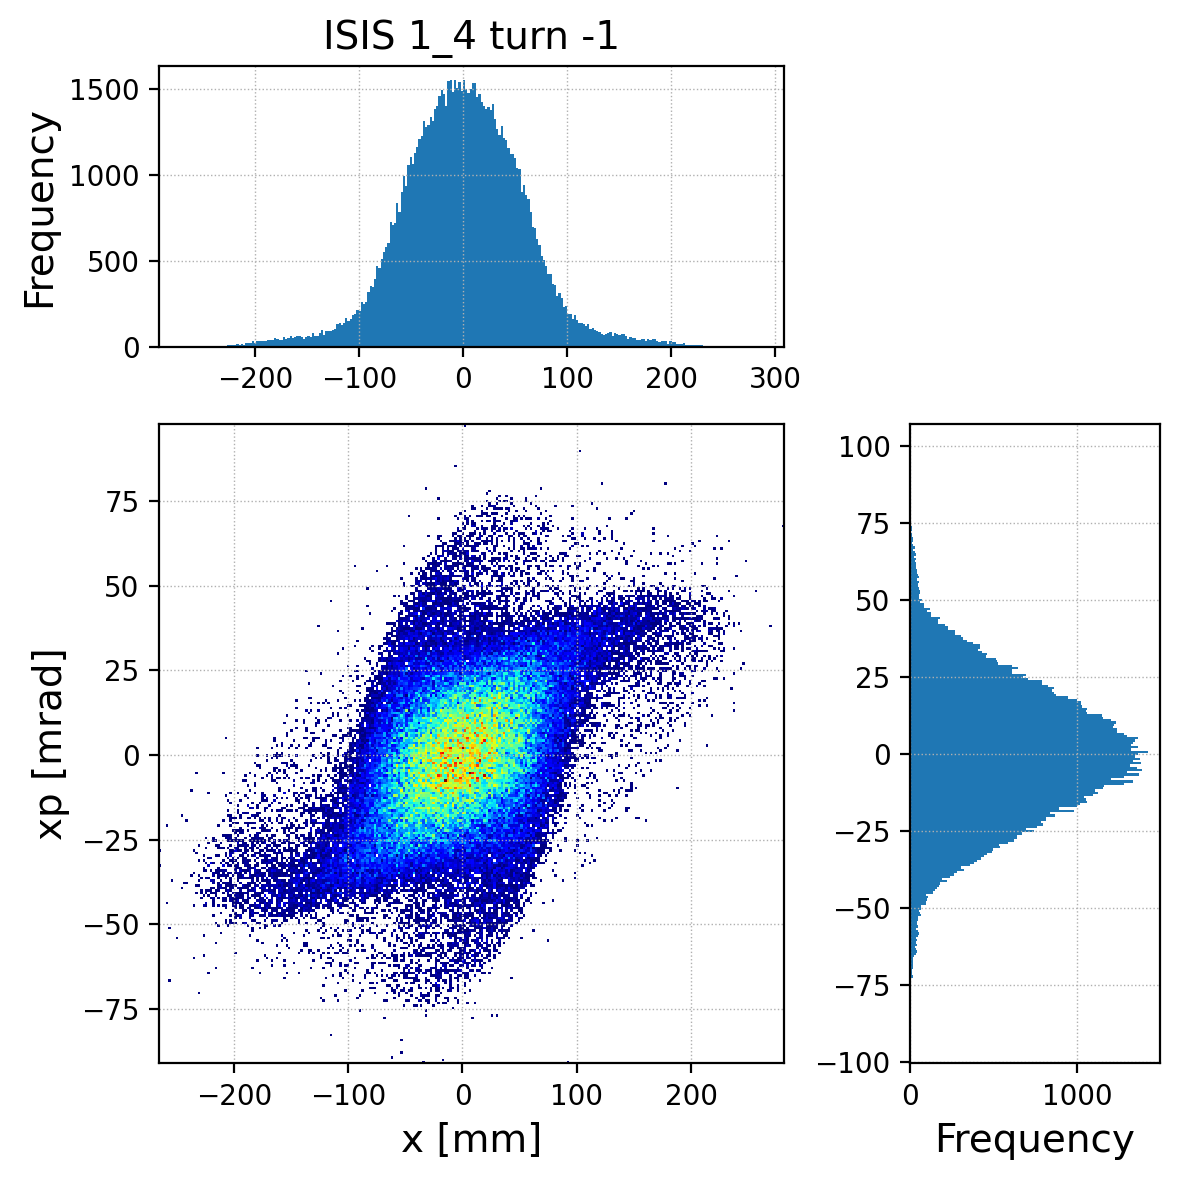

In [14]:
bin_size = 256
turn = -1
xxp_gifnames = []

for key, value in sorted(dd1.items()):
    f, ax = plt.subplots(1, figsize=(6,6))
    gridspec.GridSpec(3,3)
    #f.subplots_adjust(hspace = 0)	# Horizontal spacing between subplots
    f.subplots_adjust(wspace = 0)	# Vertical spacing between subplots

    my_cmap = plt.cm.jet
    my_cmap.set_under('w',1)

    title = str( main_label + ' ' + key + ' turn ' + str(turn) ) 
    
    z = np.array(dd1[key]['particles']['x'][0][0][0])*1E3
    dE = np.array(dd1[key]['particles']['xp'][0][0][0])*1E3
    
    # First subplot
    plt.subplot2grid((3,3), (0,0), colspan=2, rowspan=1)   
    plt.hist(z, bins=bin_size, range=(np.min(z), np.max(z))) #, norm=mcolors.PowerNorm(gamma))
    plt.title(title)
    plt.ylabel('Frequency')
    plt.grid(which='both', ls=':', lw=0.5)
    #plt.xlim(-30, 30)

    # Main plot
    plt.subplot2grid((3,3), (1,0), colspan=2, rowspan=2)
    plt.hist2d(z, dE, bins=bin_size, cmap=my_cmap, vmin=1, range=[[np.min(z), np.max(z)], [np.min(dE), np.max(dE)]]) #, norm=mcolors.PowerNorm(gamma))
    plt.xlabel('x [mm]')
    plt.ylabel('xp [mrad]')
    plt.grid(which='both', ls=':', lw=0.5)
    #plt.xlim(-30, 30)
    #plt.ylim(-10, 10)

    # Second subplot
    plt.subplot2grid((3,3), (1,2), colspan=1, rowspan=2)    
    plt.hist(dE, bins=bin_size, range=(np.min(dE), np.max(dE)), orientation=u'horizontal') #, norm=mcolors.PowerNorm(gamma))
    plt.xlabel('Frequency')
    plt.grid(which='both', ls=':', lw=0.5)
    #plt.ylim(-10, 10)

    current_axis = plt.gca()
    #current_axis.axes.get_yaxis().set_visible(False)

    #ax.xaxis.label.set_size(fontsize)
    #ax.yaxis.label.set_size(fontsize)

    #ax.tick_params(labelsize=fontsize)

    plt.tight_layout()
    savename = str(save_folder + Case +'_x_xp_turn_' + str(turn) + '_' + key + '_hist.png' )
    zdE_gifnames.append(savename)
    f.savefig(savename, dpi=500)

<ipython-input-15-53637b855de8>:12: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet"))
  my_cmap.set_under('w',1)


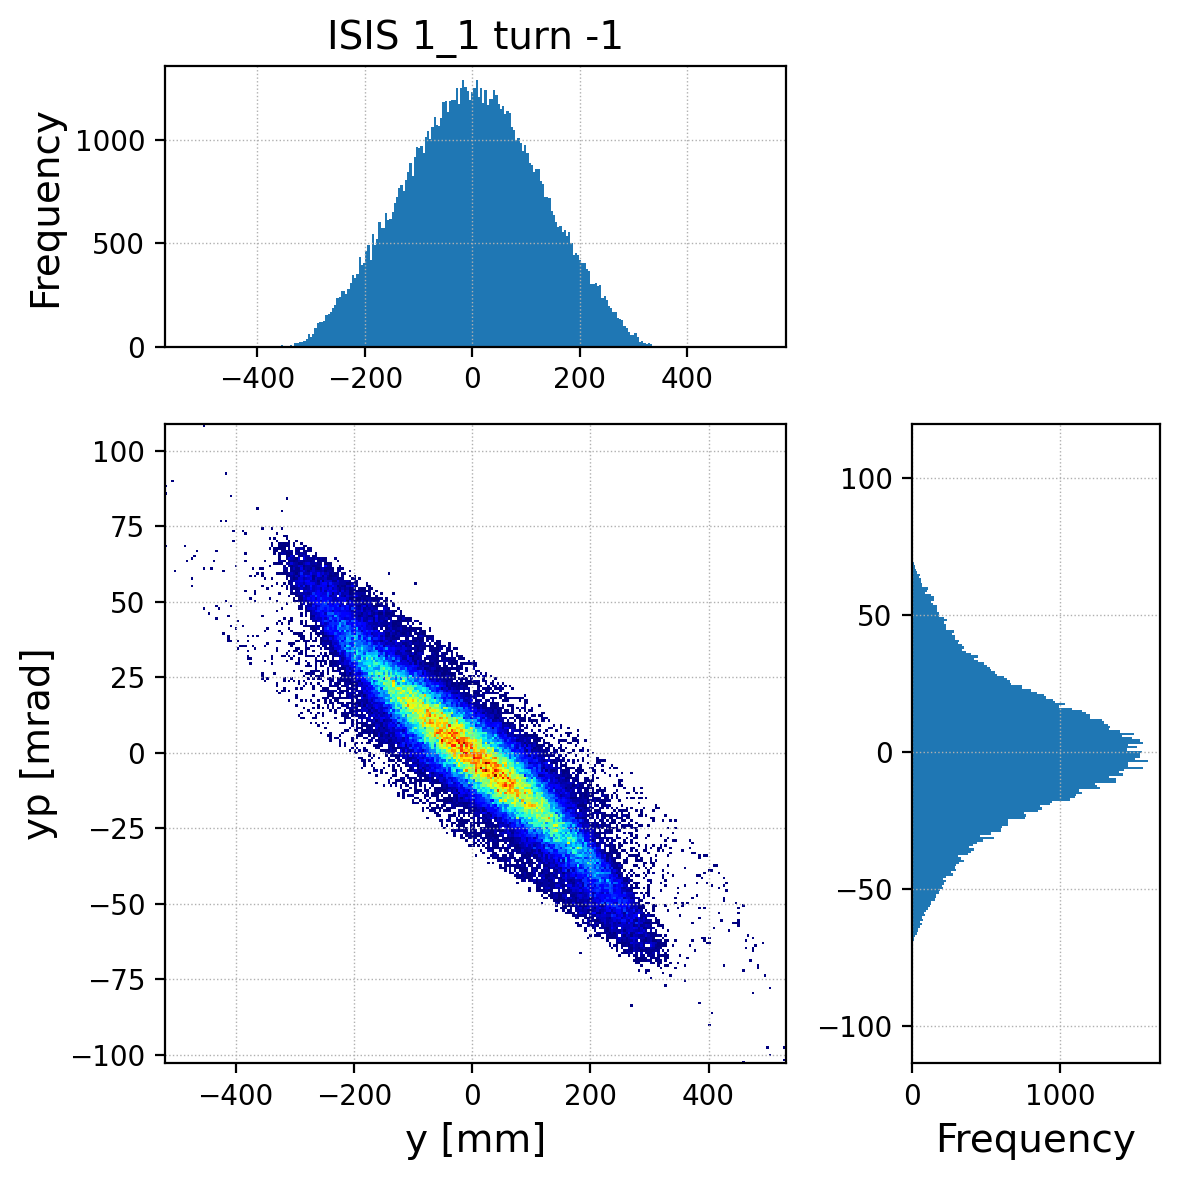

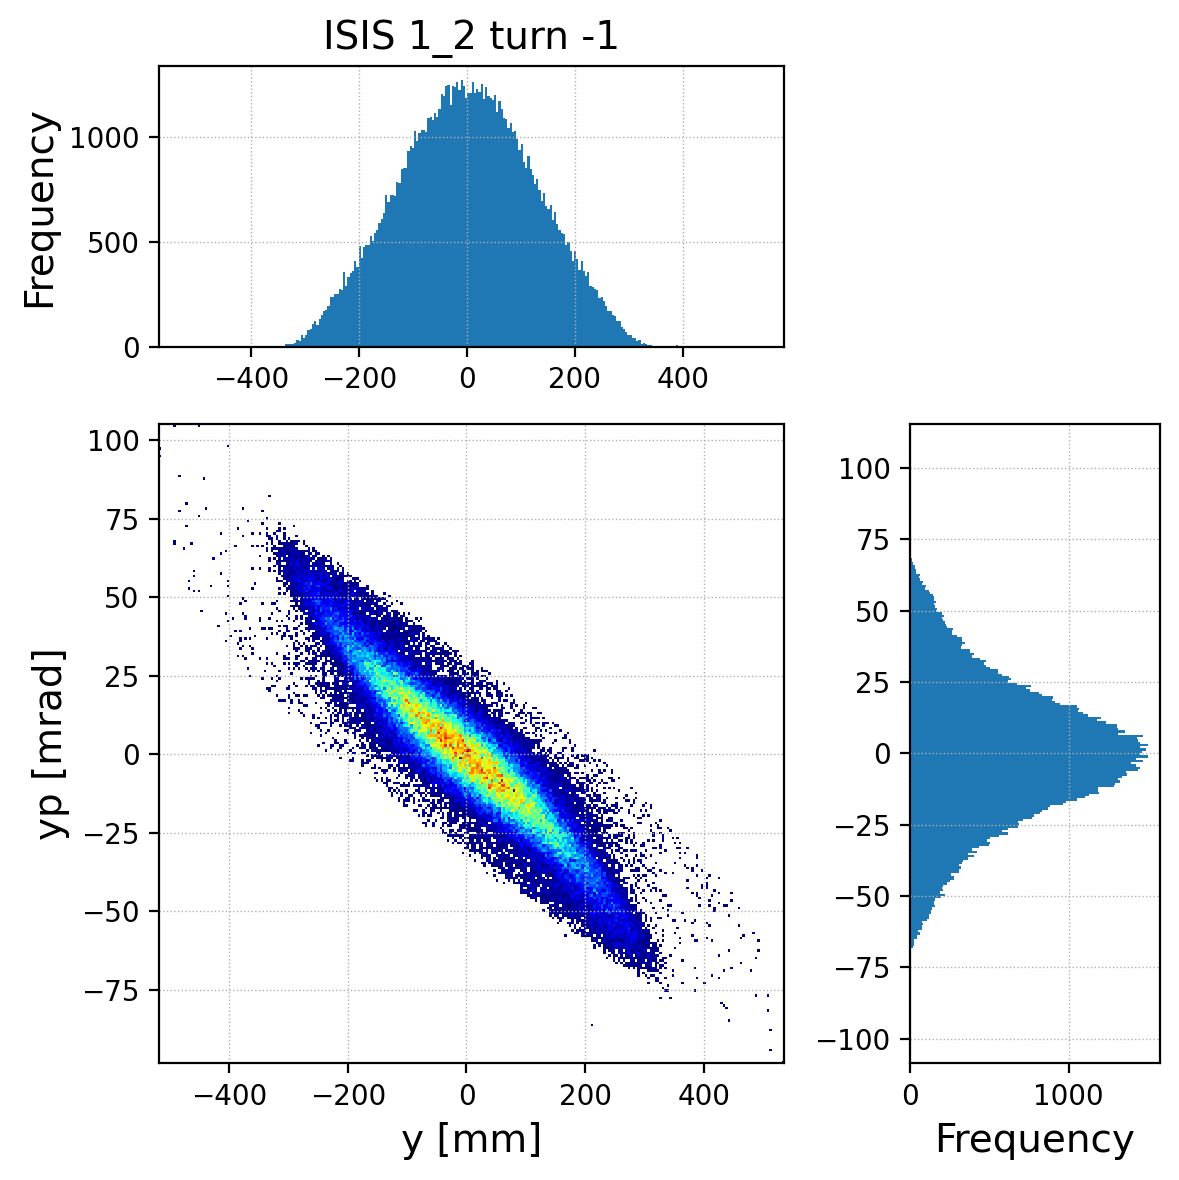

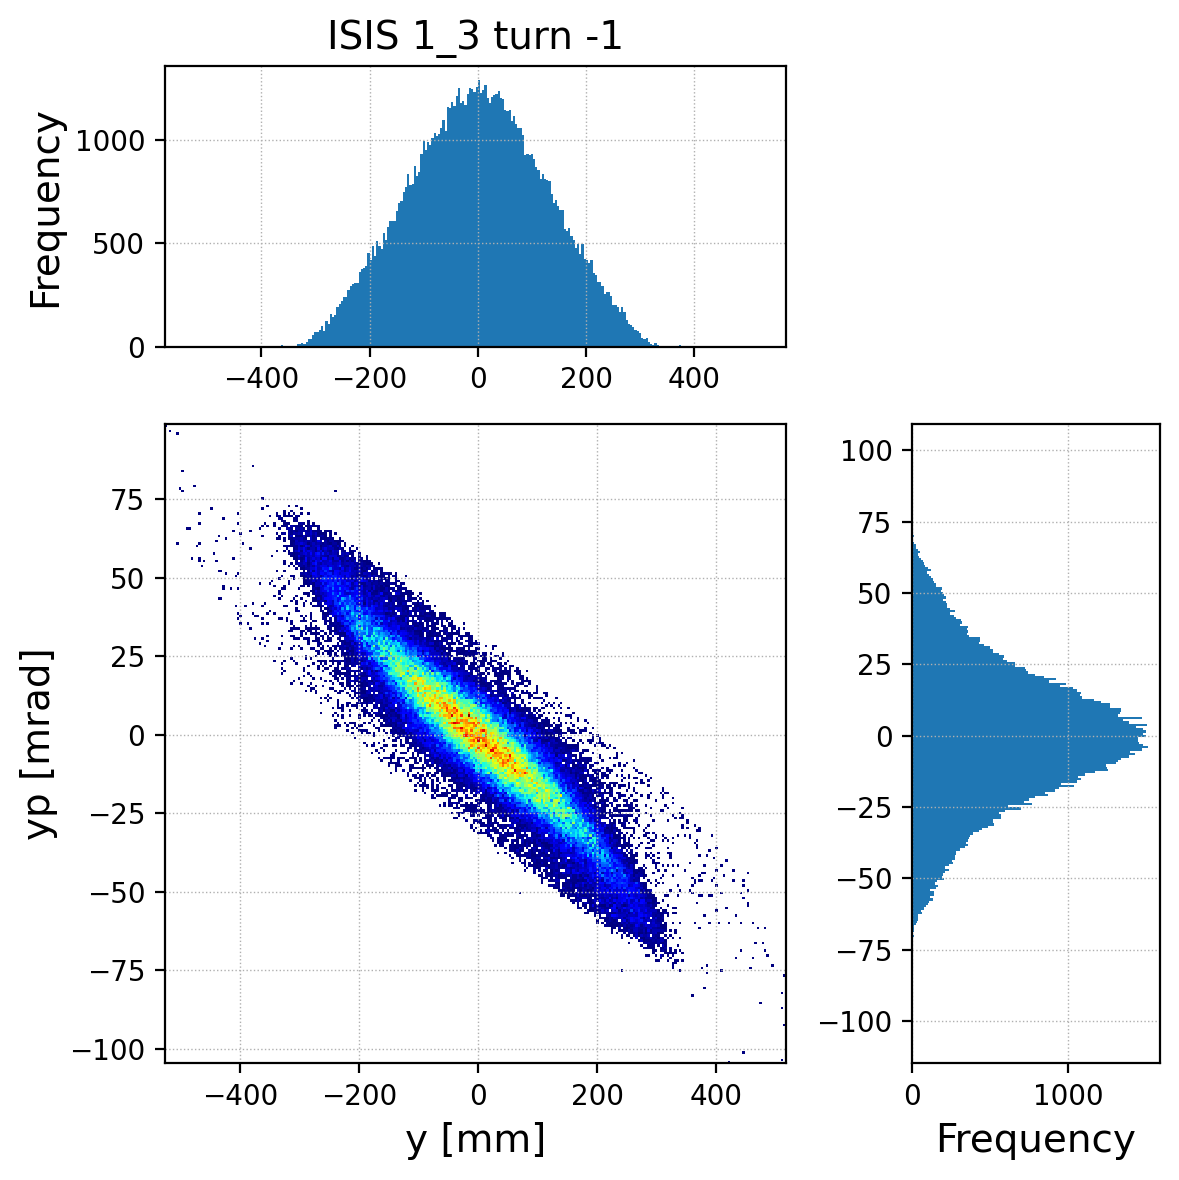

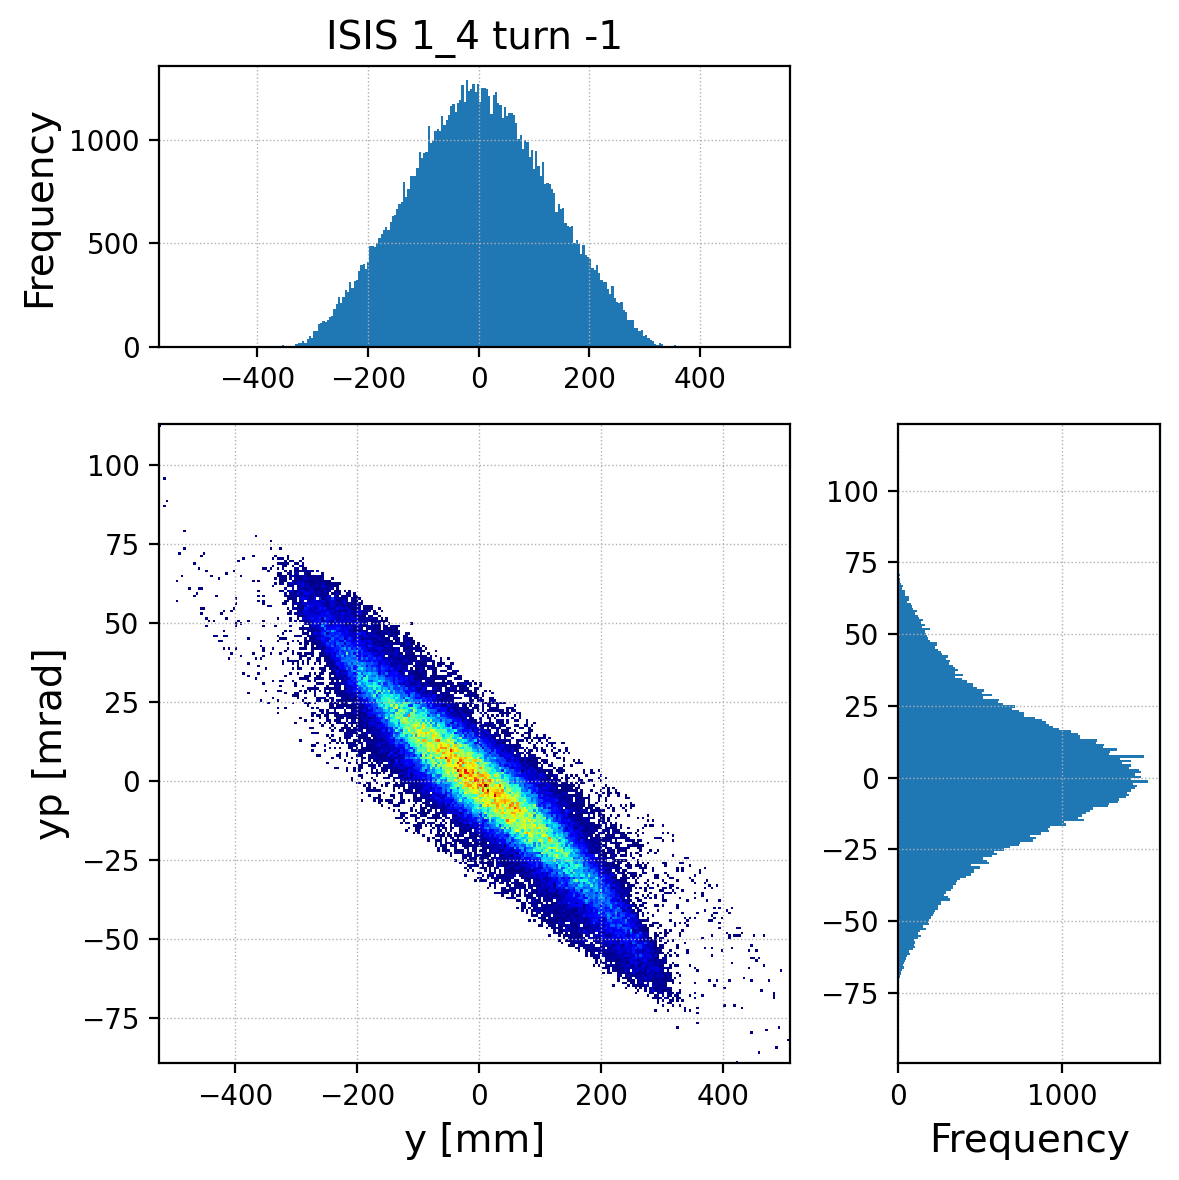

In [15]:
bin_size = 256
turn = -1
yyp_gifnames = []

for key, value in sorted(dd1.items()):
    f, ax = plt.subplots(1, figsize=(6,6))
    gridspec.GridSpec(3,3)
    #f.subplots_adjust(hspace = 0)	# Horizontal spacing between subplots
    f.subplots_adjust(wspace = 0)	# Vertical spacing between subplots

    my_cmap = plt.cm.jet
    my_cmap.set_under('w',1)

    title = str( main_label + ' ' + key + ' turn ' + str(turn) ) 
    
    z = np.array(dd1[key]['particles']['y'][0][0][0])*1E3
    dE = np.array(dd1[key]['particles']['yp'][0][0][0])*1E3
    
    # First subplot
    plt.subplot2grid((3,3), (0,0), colspan=2, rowspan=1)   
    plt.hist(z, bins=bin_size, range=(np.min(z), np.max(z))) #, norm=mcolors.PowerNorm(gamma))
    plt.title(title)
    plt.ylabel('Frequency')
    plt.grid(which='both', ls=':', lw=0.5)
    #plt.xlim(-30, 30)

    # Main plot
    plt.subplot2grid((3,3), (1,0), colspan=2, rowspan=2)
    plt.hist2d(z, dE, bins=bin_size, cmap=my_cmap, vmin=1, range=[[np.min(z), np.max(z)], [np.min(dE), np.max(dE)]]) #, norm=mcolors.PowerNorm(gamma))
    plt.xlabel('y [mm]')
    plt.ylabel('yp [mrad]')
    plt.grid(which='both', ls=':', lw=0.5)
    #plt.xlim(-30, 30)
    #plt.ylim(-10, 10)

    # Second subplot
    plt.subplot2grid((3,3), (1,2), colspan=1, rowspan=2)    
    plt.hist(dE, bins=bin_size, range=(np.min(dE), np.max(dE)), orientation=u'horizontal') #, norm=mcolors.PowerNorm(gamma))
    plt.xlabel('Frequency')
    plt.grid(which='both', ls=':', lw=0.5)
    #plt.ylim(-10, 10)

    current_axis = plt.gca()
    #current_axis.axes.get_yaxis().set_visible(False)

    #ax.xaxis.label.set_size(fontsize)
    #ax.yaxis.label.set_size(fontsize)

    #ax.tick_params(labelsize=fontsize)

    plt.tight_layout()
    savename = str(save_folder + Case +'_y_yp_turn_' + str(turn) + '_' + key + '_hist.png' )
    zdE_gifnames.append(savename)
    f.savefig(savename, dpi=500)

<ipython-input-16-0316e80e1fdb>:12: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet"))
  my_cmap.set_under('w',1)


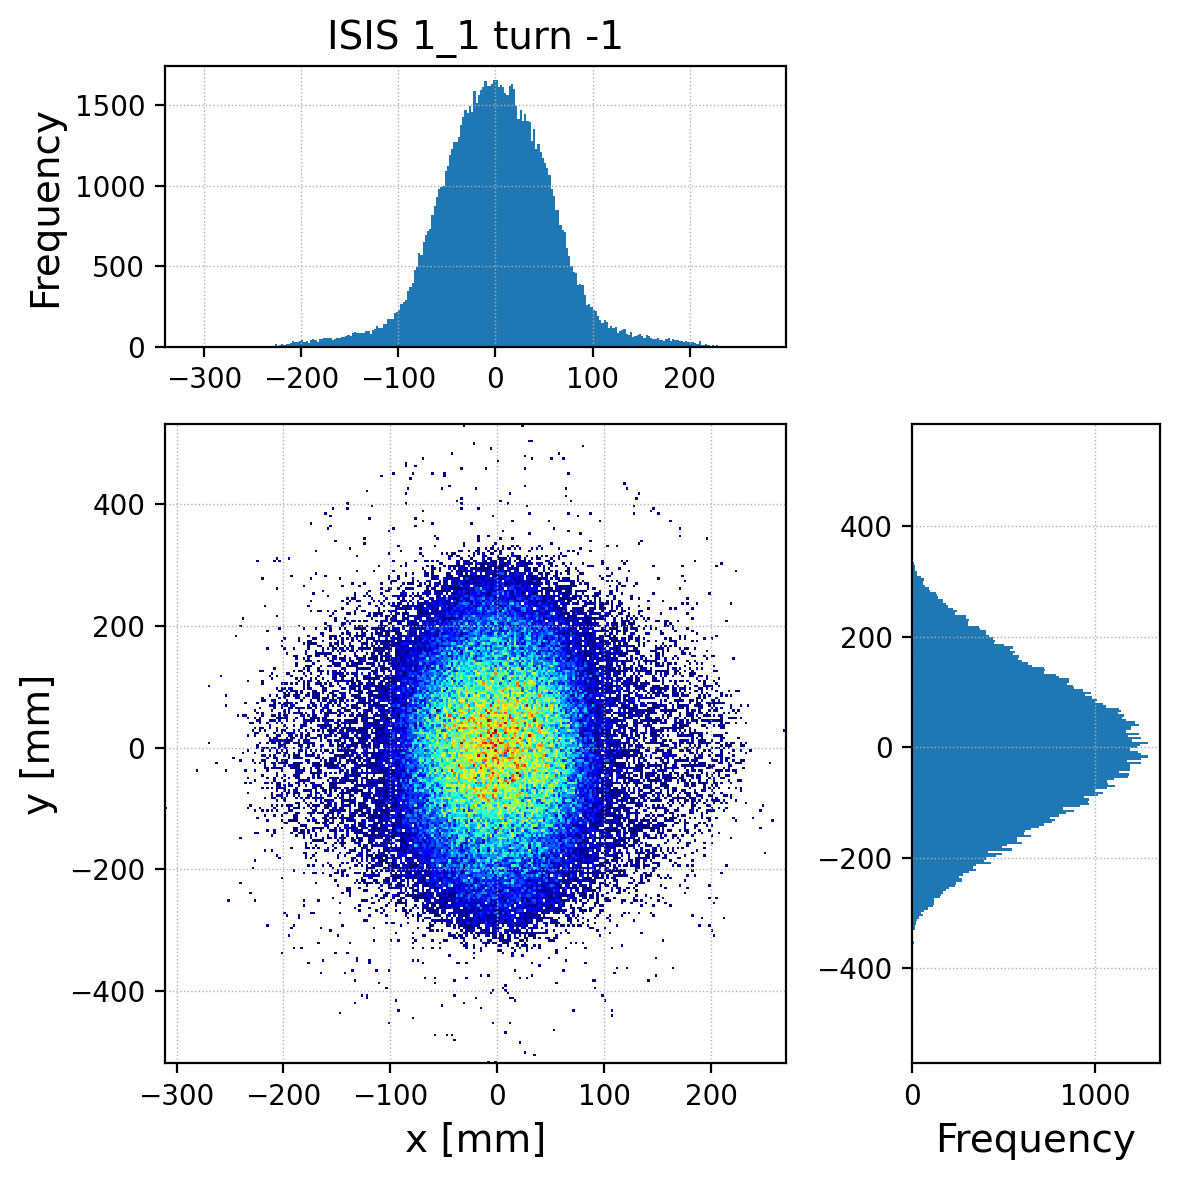

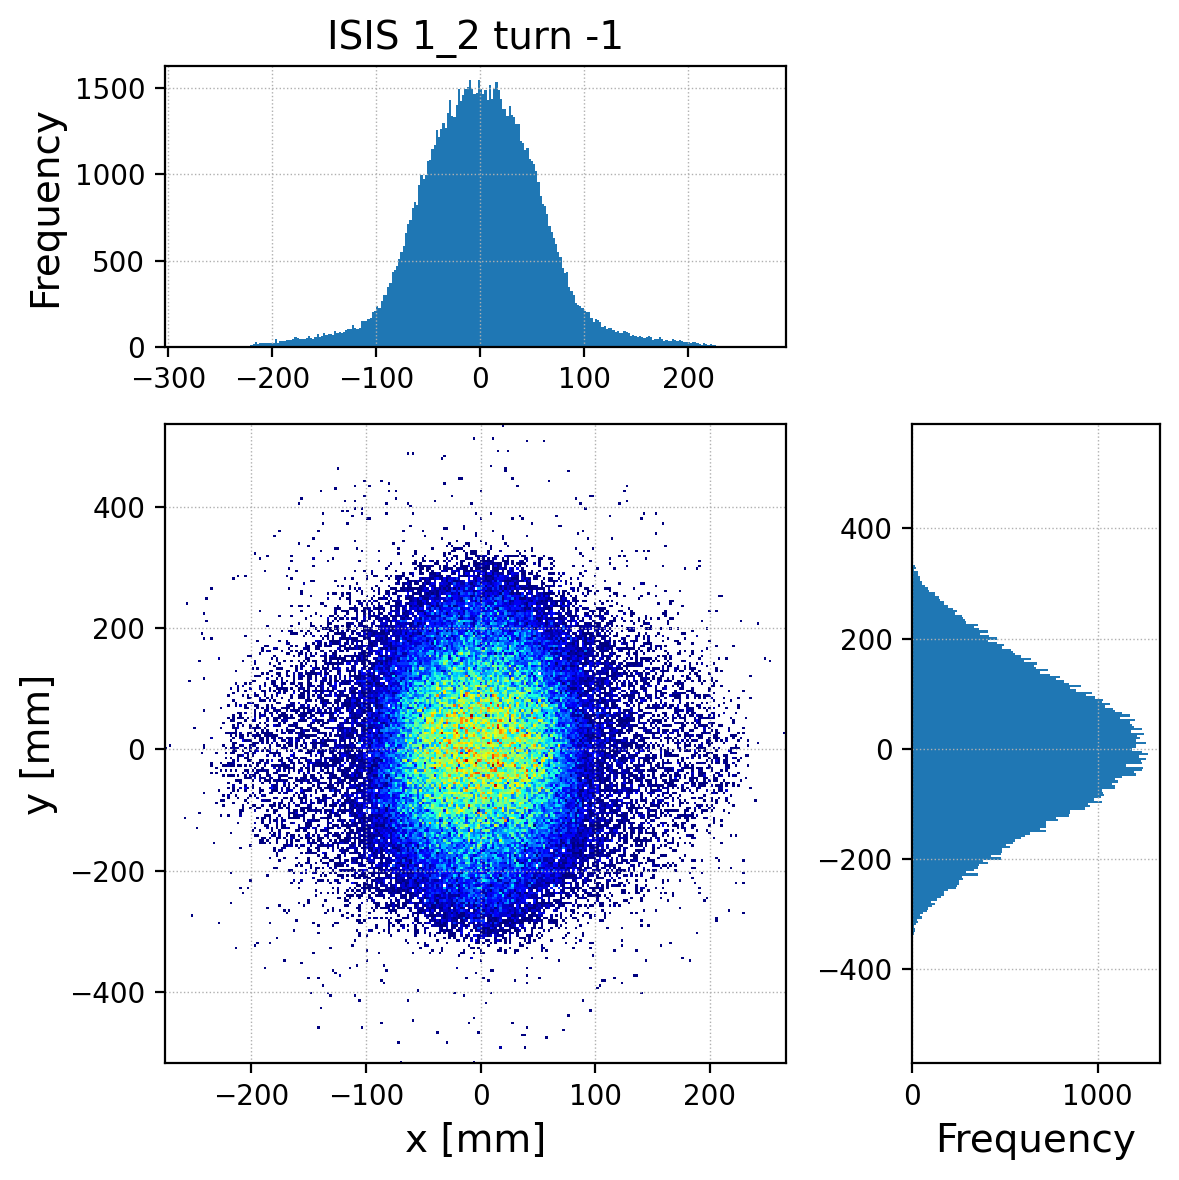

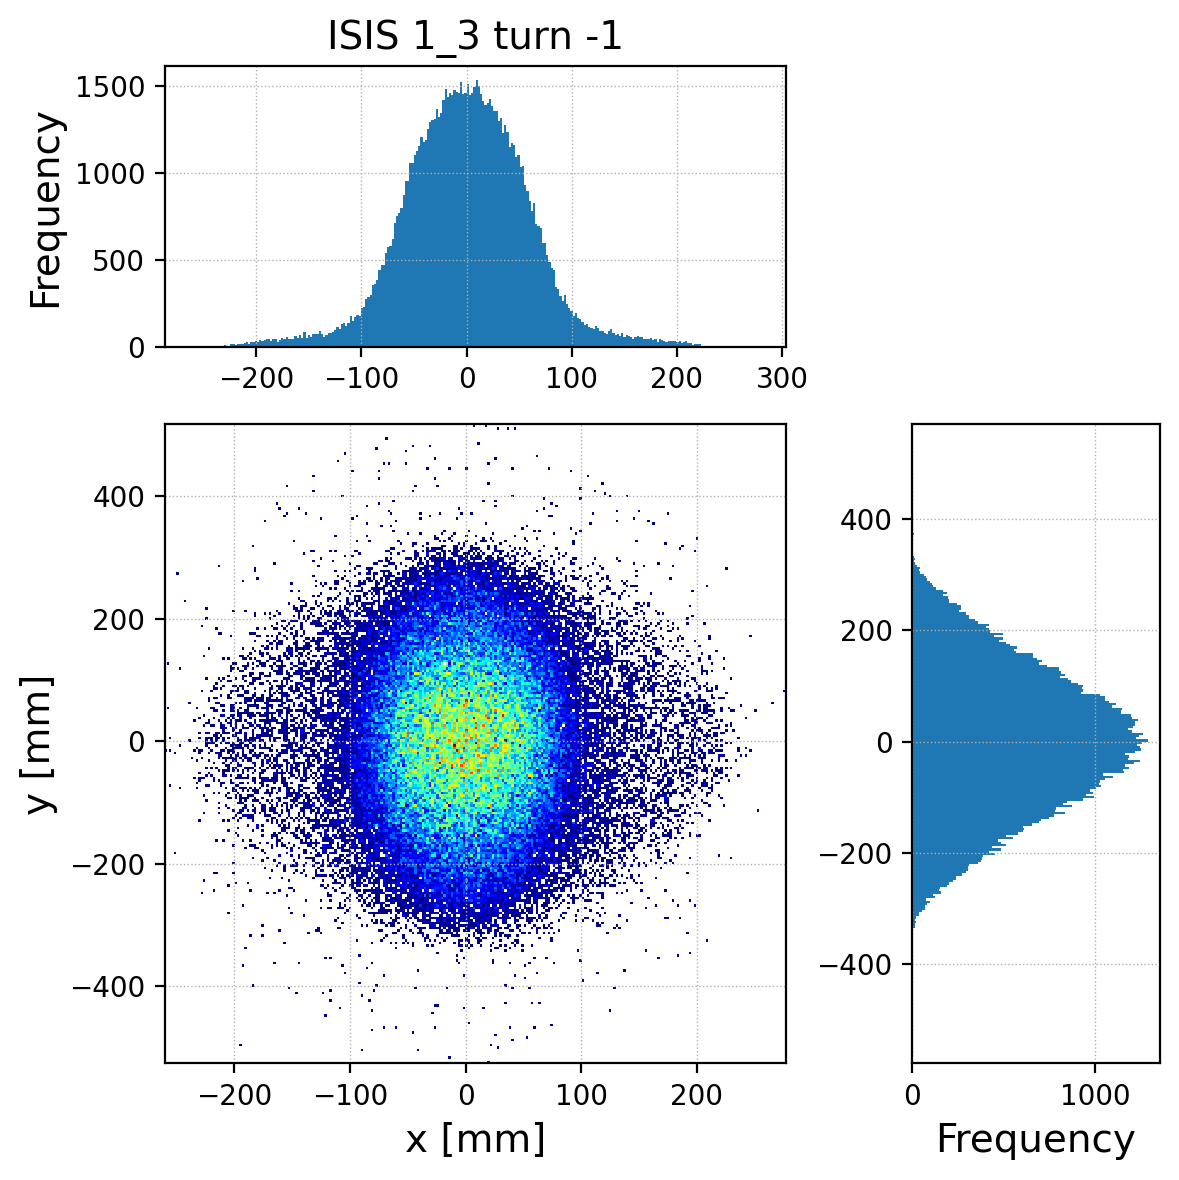

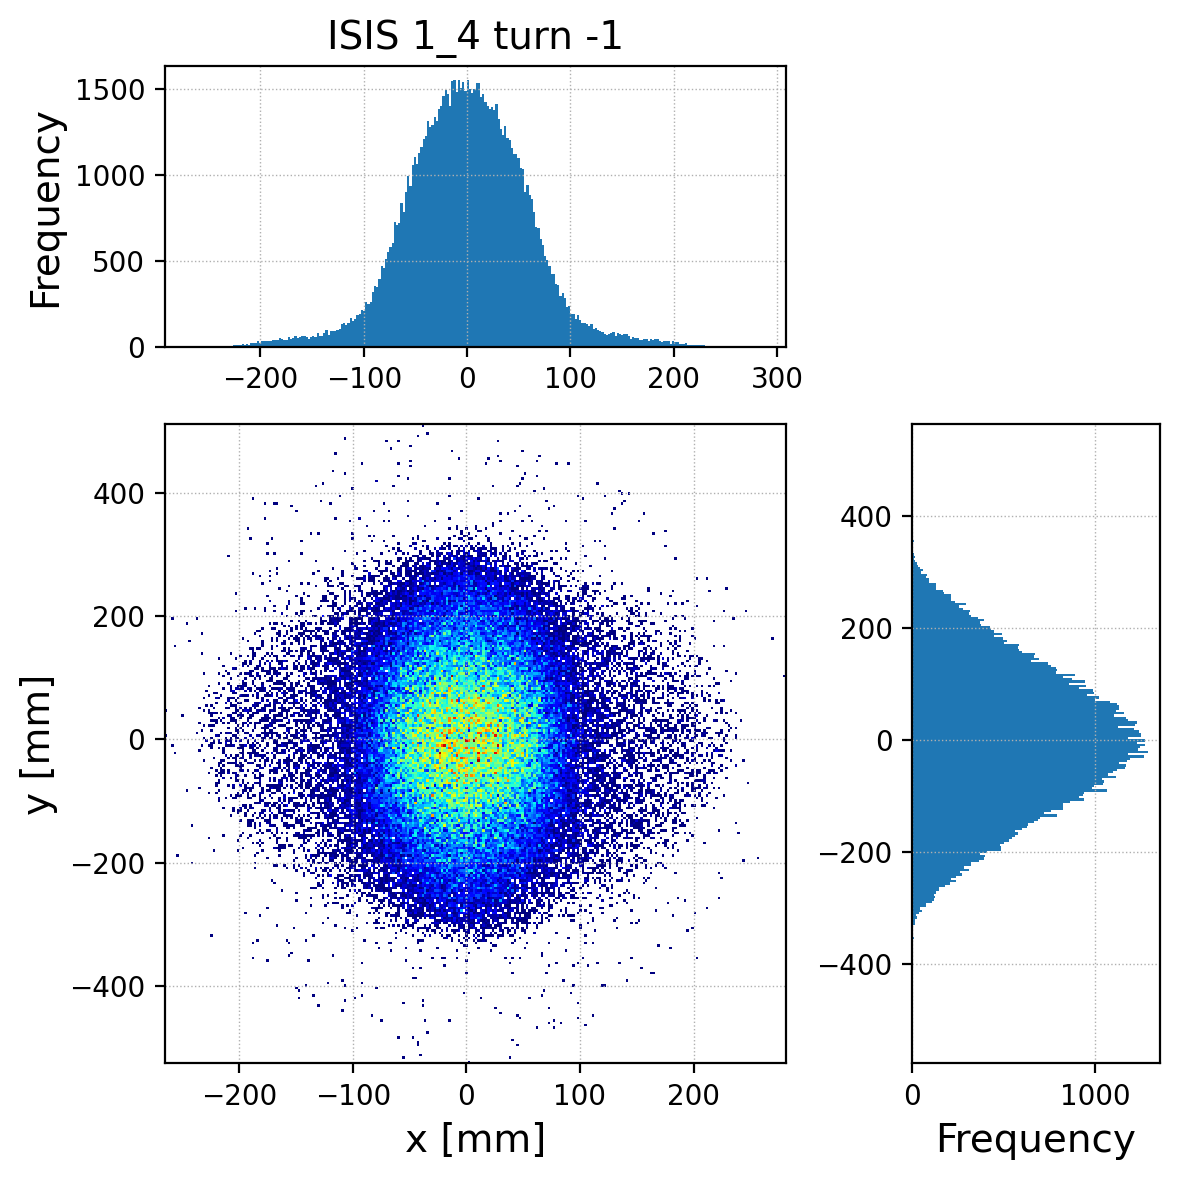

In [16]:
bin_size = 256
turn = -1
xy_gifnames = []

for key, value in sorted(dd1.items()):
    f, ax = plt.subplots(1, figsize=(6,6))
    gridspec.GridSpec(3,3)
    #f.subplots_adjust(hspace = 0)	# Horizontal spacing between subplots
    f.subplots_adjust(wspace = 0)	# Vertical spacing between subplots

    my_cmap = plt.cm.jet
    my_cmap.set_under('w',1)

    title = str( main_label + ' ' + key + ' turn ' + str(turn) ) 
    
    z = np.array(dd1[key]['particles']['x'][0][0][0])*1E3
    dE = np.array(dd1[key]['particles']['y'][0][0][0])*1E3
    
    # First subplot
    plt.subplot2grid((3,3), (0,0), colspan=2, rowspan=1)   
    plt.hist(z, bins=bin_size, range=(np.min(z), np.max(z))) #, norm=mcolors.PowerNorm(gamma))
    plt.title(title)
    plt.ylabel('Frequency')
    plt.grid(which='both', ls=':', lw=0.5)
    #plt.xlim(-30, 30)

    # Main plot
    plt.subplot2grid((3,3), (1,0), colspan=2, rowspan=2)
    plt.hist2d(z, dE, bins=bin_size, cmap=my_cmap, vmin=1, range=[[np.min(z), np.max(z)], [np.min(dE), np.max(dE)]]) #, norm=mcolors.PowerNorm(gamma))
    plt.xlabel('x [mm]')
    plt.ylabel('y [mm]')
    plt.grid(which='both', ls=':', lw=0.5)
    #plt.xlim(-30, 30)
    #plt.ylim(-10, 10)

    # Second subplot
    plt.subplot2grid((3,3), (1,2), colspan=1, rowspan=2)    
    plt.hist(dE, bins=bin_size, range=(np.min(dE), np.max(dE)), orientation=u'horizontal') #, norm=mcolors.PowerNorm(gamma))
    plt.xlabel('Frequency')
    plt.grid(which='both', ls=':', lw=0.5)
    #plt.ylim(-10, 10)

    current_axis = plt.gca()
    #current_axis.axes.get_yaxis().set_visible(False)

    #ax.xaxis.label.set_size(fontsize)
    #ax.yaxis.label.set_size(fontsize)

    #ax.tick_params(labelsize=fontsize)

    plt.tight_layout()
    savename = str(save_folder + Case +'_x_y_turn_' + str(turn) + '_' + key + '_hist.png' )
    zdE_gifnames.append(savename)
    f.savefig(savename, dpi=500)